In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0886121001PNS003SRSPEC0003.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.353e-02 +/- 1.604e-03 (76.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-37
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.727e+04 sec
 Using fit statistic: chi
 Using Background File                P0886121001PNS003BGSPEC0003.FTZ
  Background Exposure Time: 1.727e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY7.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886121001PNS003SRCARF0003.FTZ



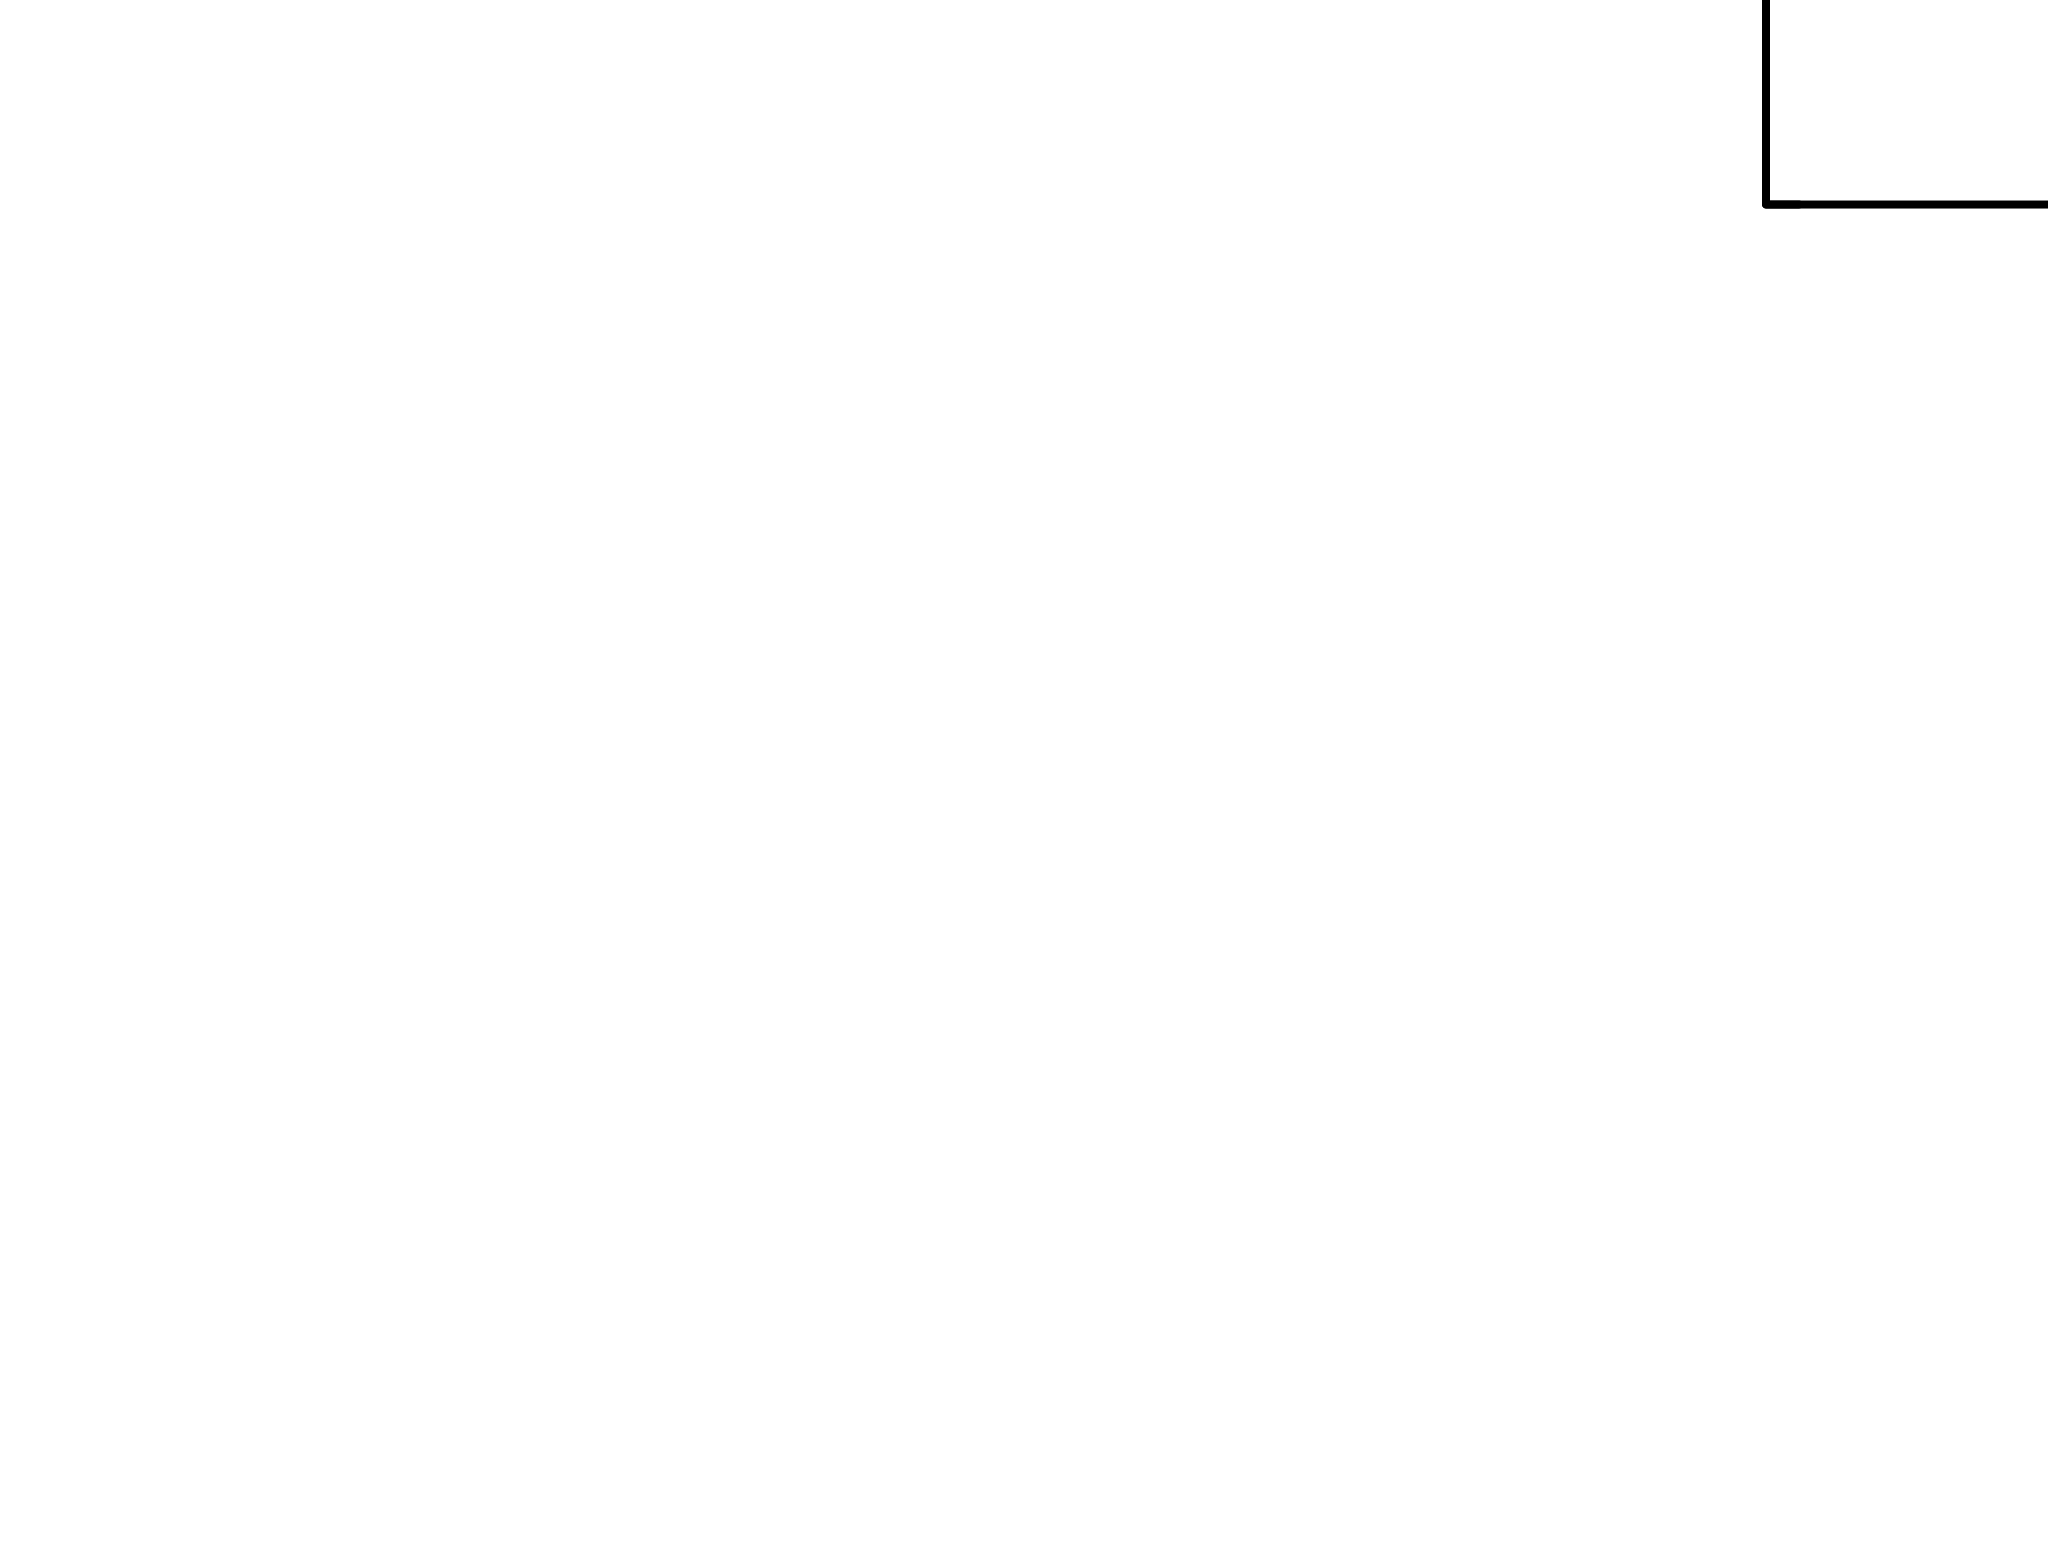

In [3]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0005 0.02")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (37) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

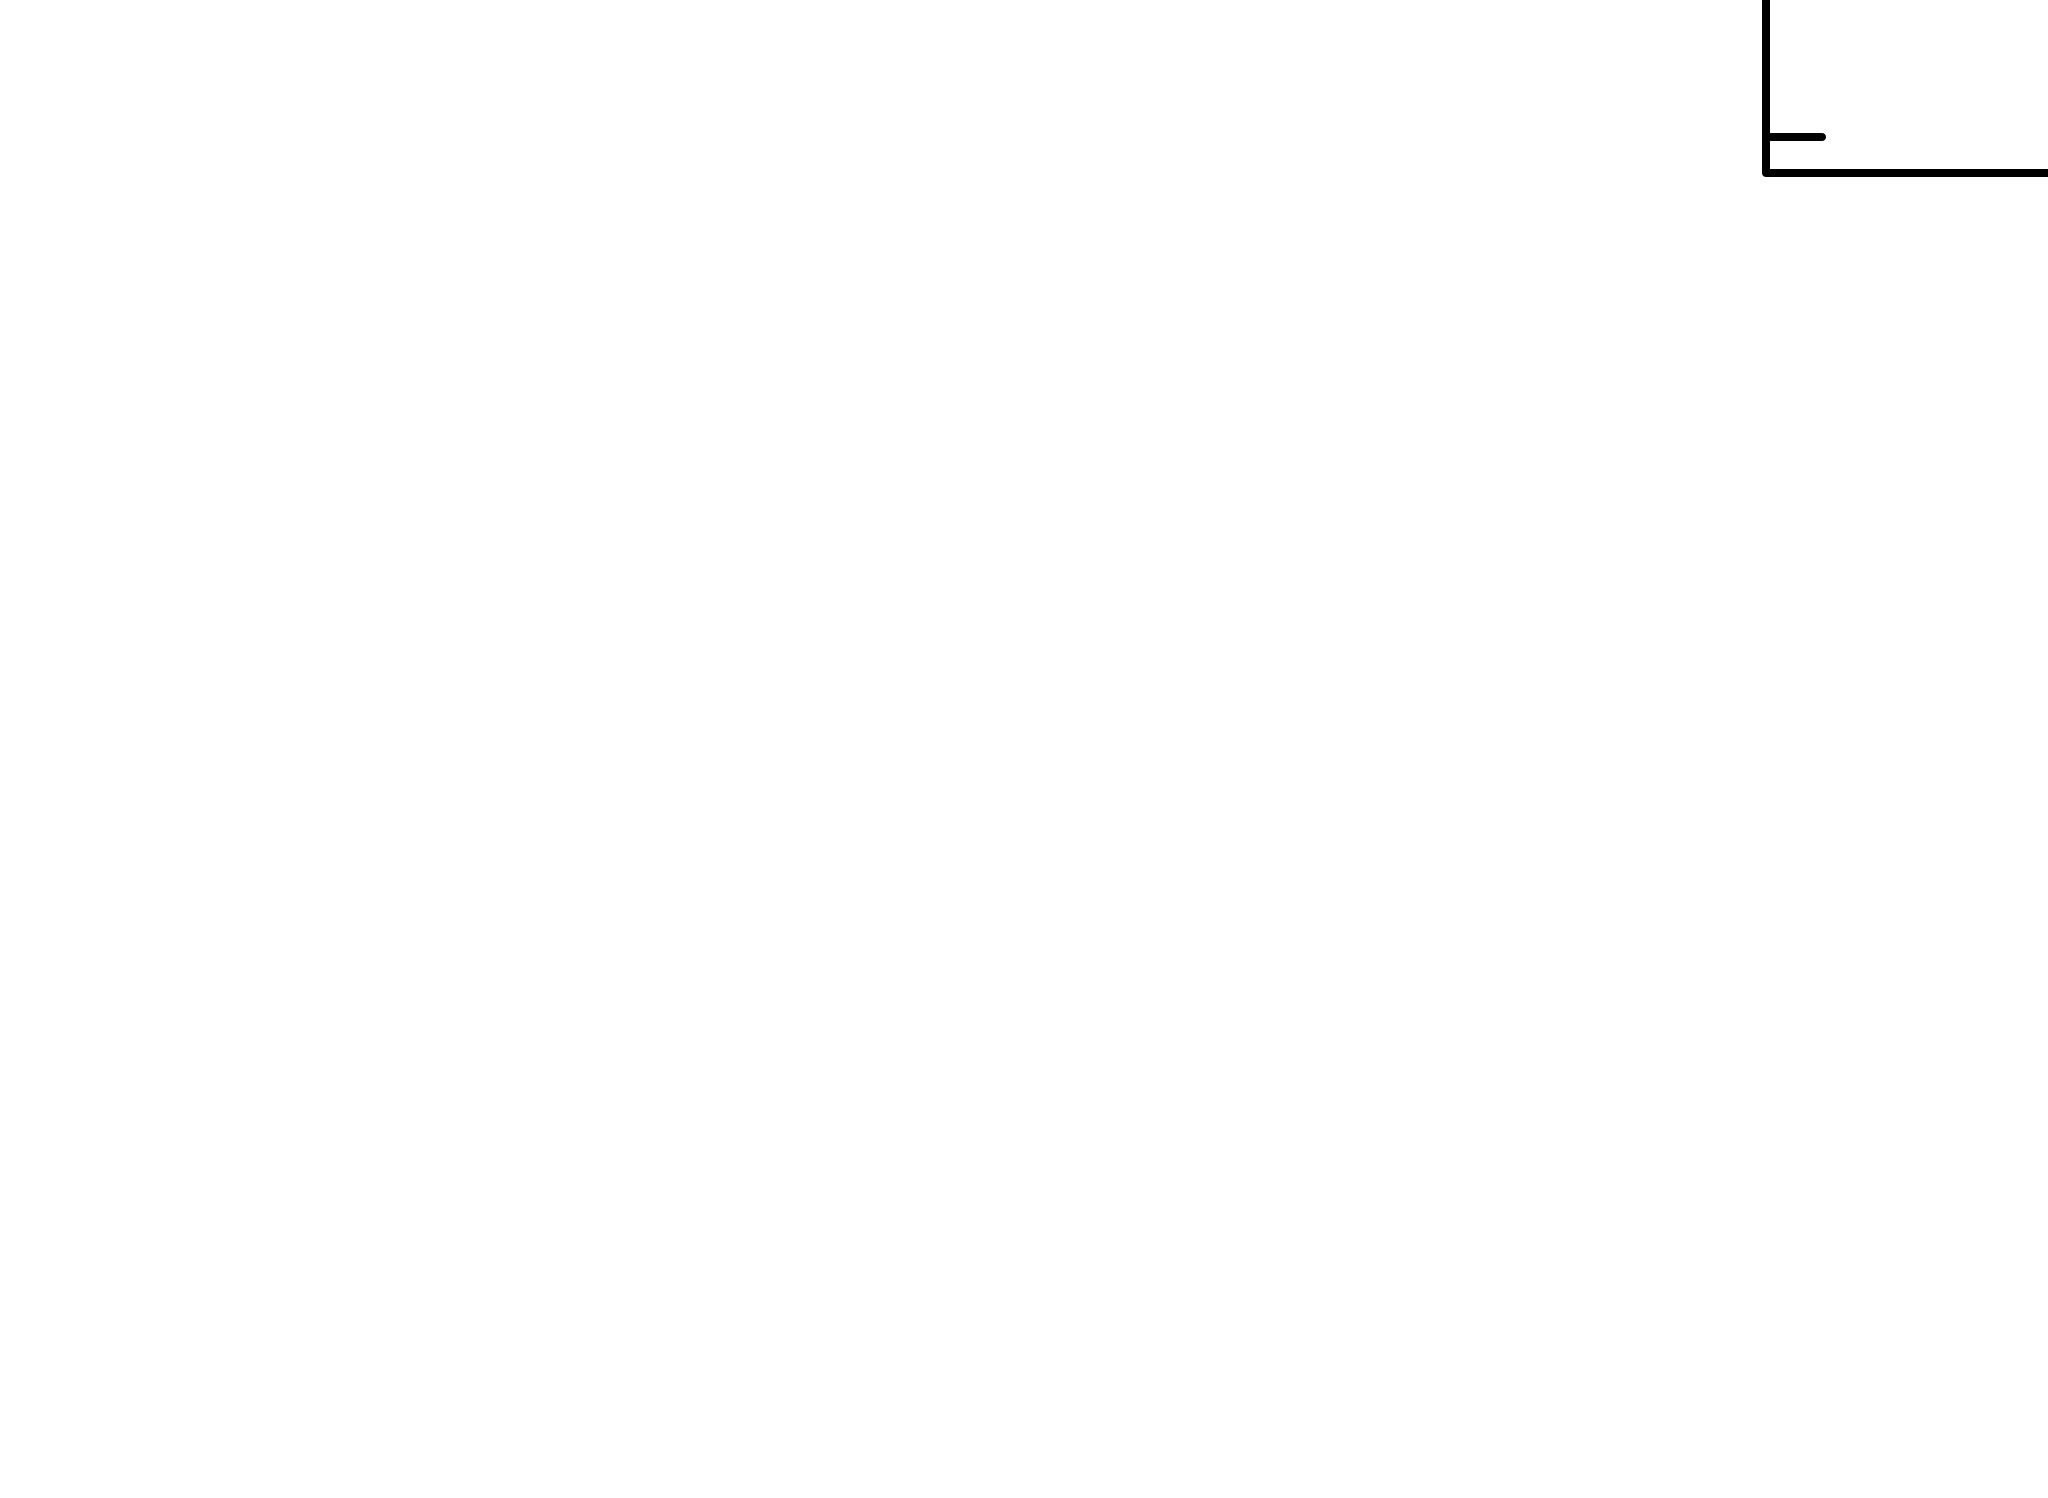

In [4]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.948579      3.10285    (-0.793819,1.36045)



***XSPEC Error:  No variable parameters for fit 

 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 1.7424 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 0.0502515 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.0578957

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2            0            0    (-41.5057,-41.5057)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.627234e+10     using 36 bins.

Test statistic : Chi-Squared              2.627234e+10     using 36 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
382.692      12.4623       0       1.33355       46.4256   4.51951e-05
271.768      259216       -1       4.68107       197.687   0.000194629
89.3783      135243       -2       10.7184       199.102   0.000843309


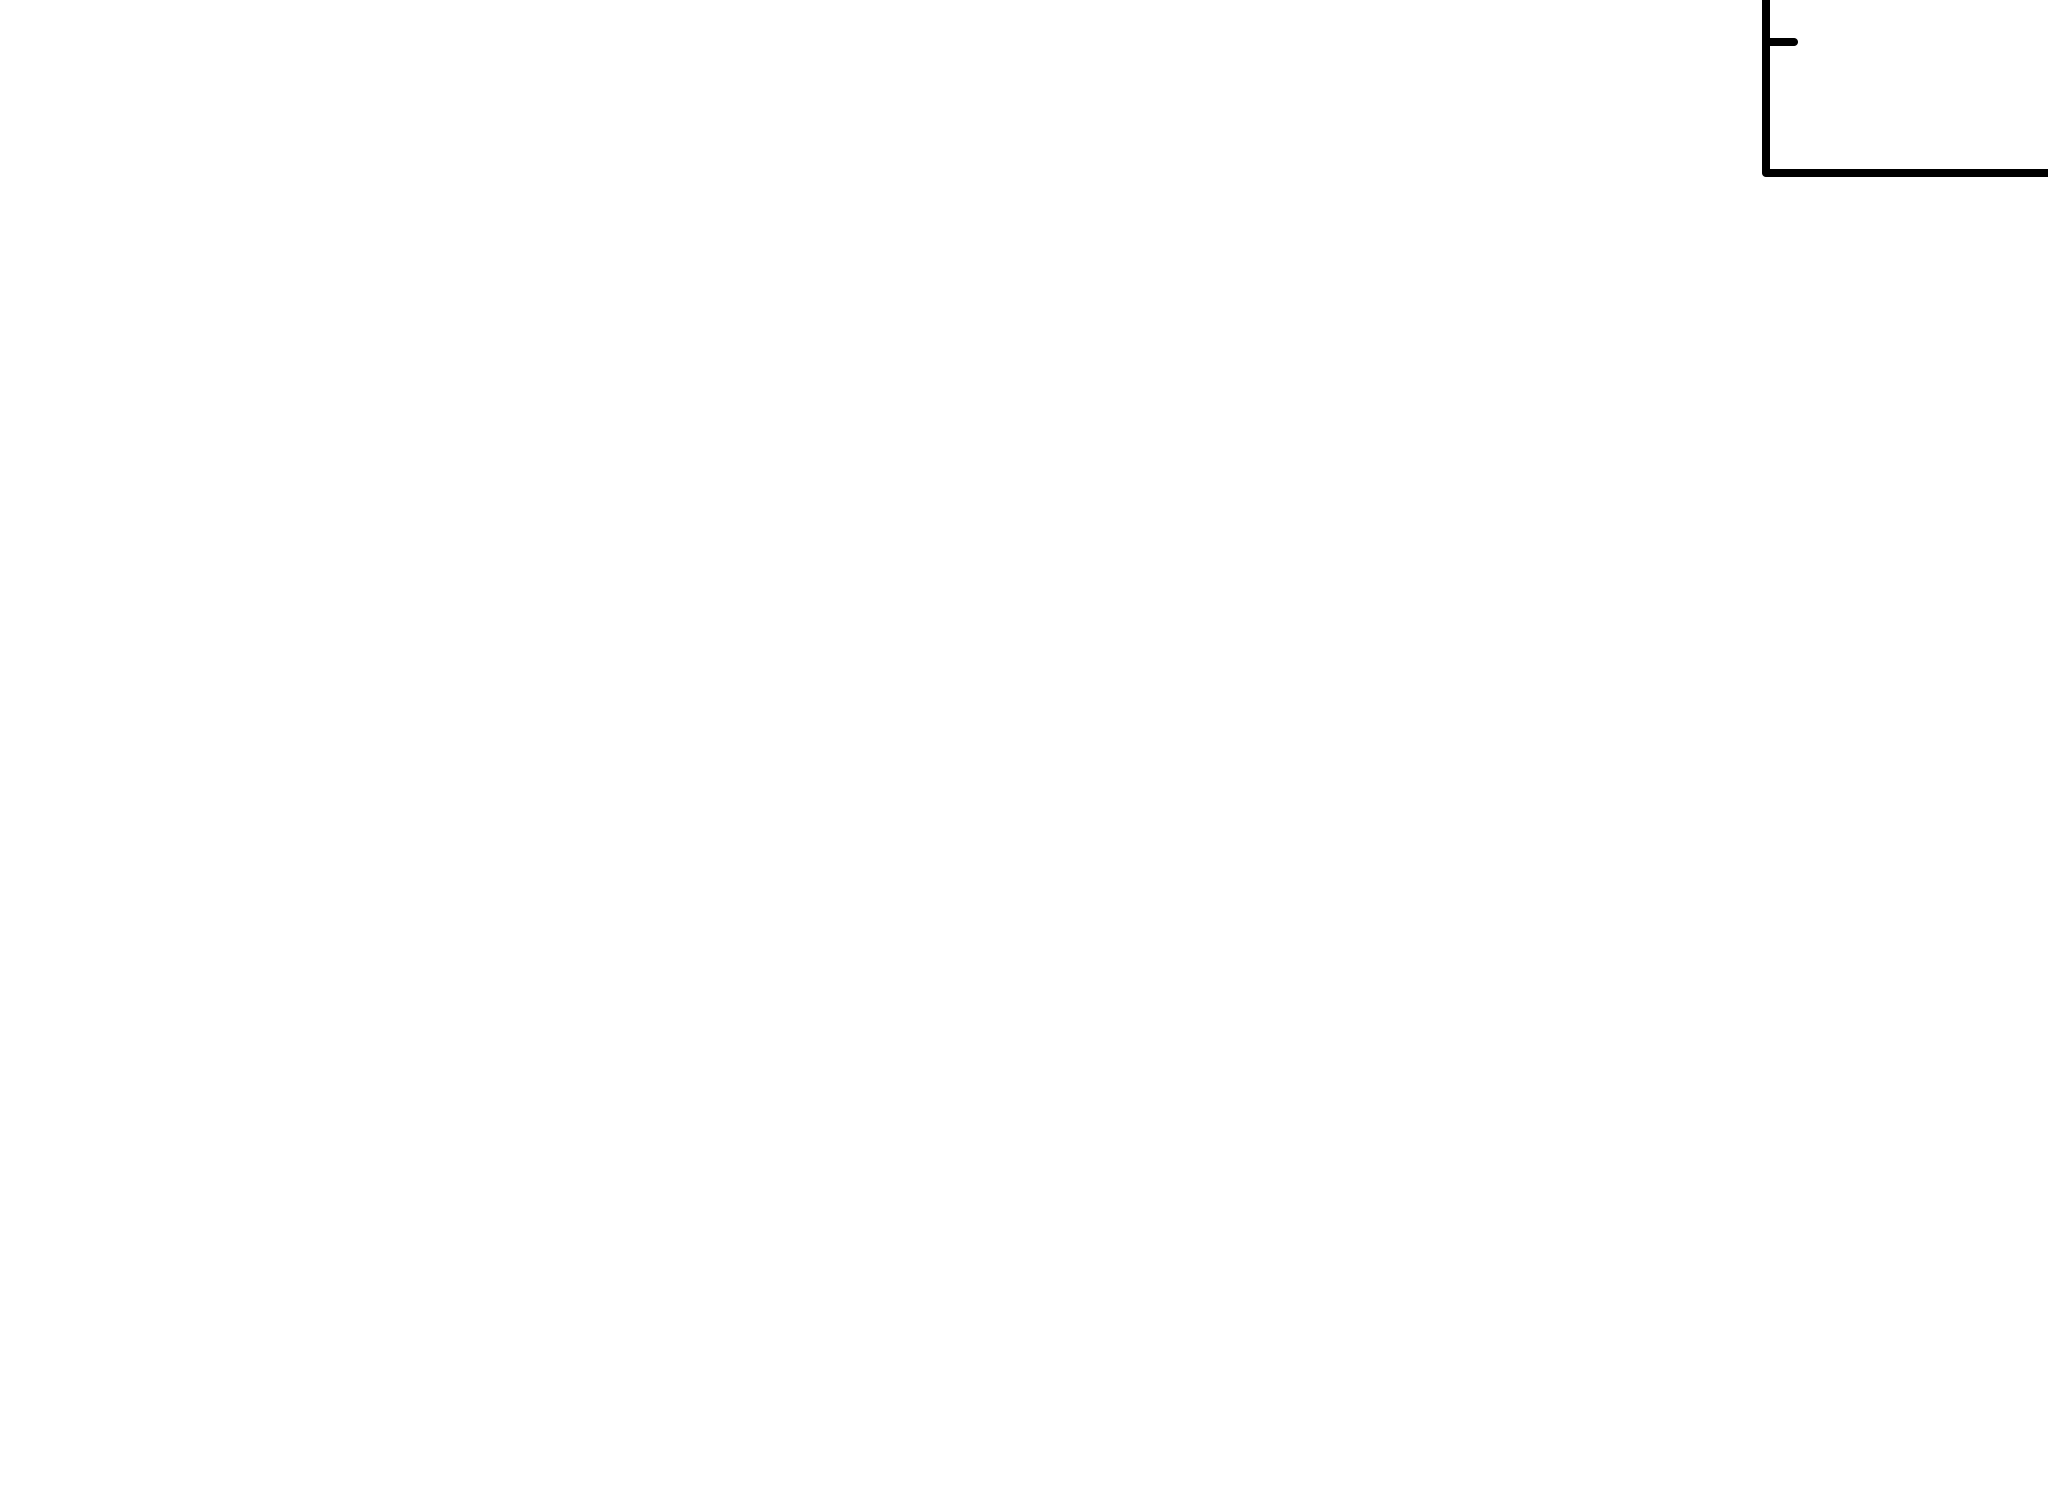

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
# Fit.error("1")
# Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[3,4:7] = mo.bremss.kT.values[0], np.inf, np.inf
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.452996e+10     using 36 bins.

Test statistic : Chi-Squared              1.452996e+10     using 36 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
476.708      1.03764      -3     0.0971248       17.9957   

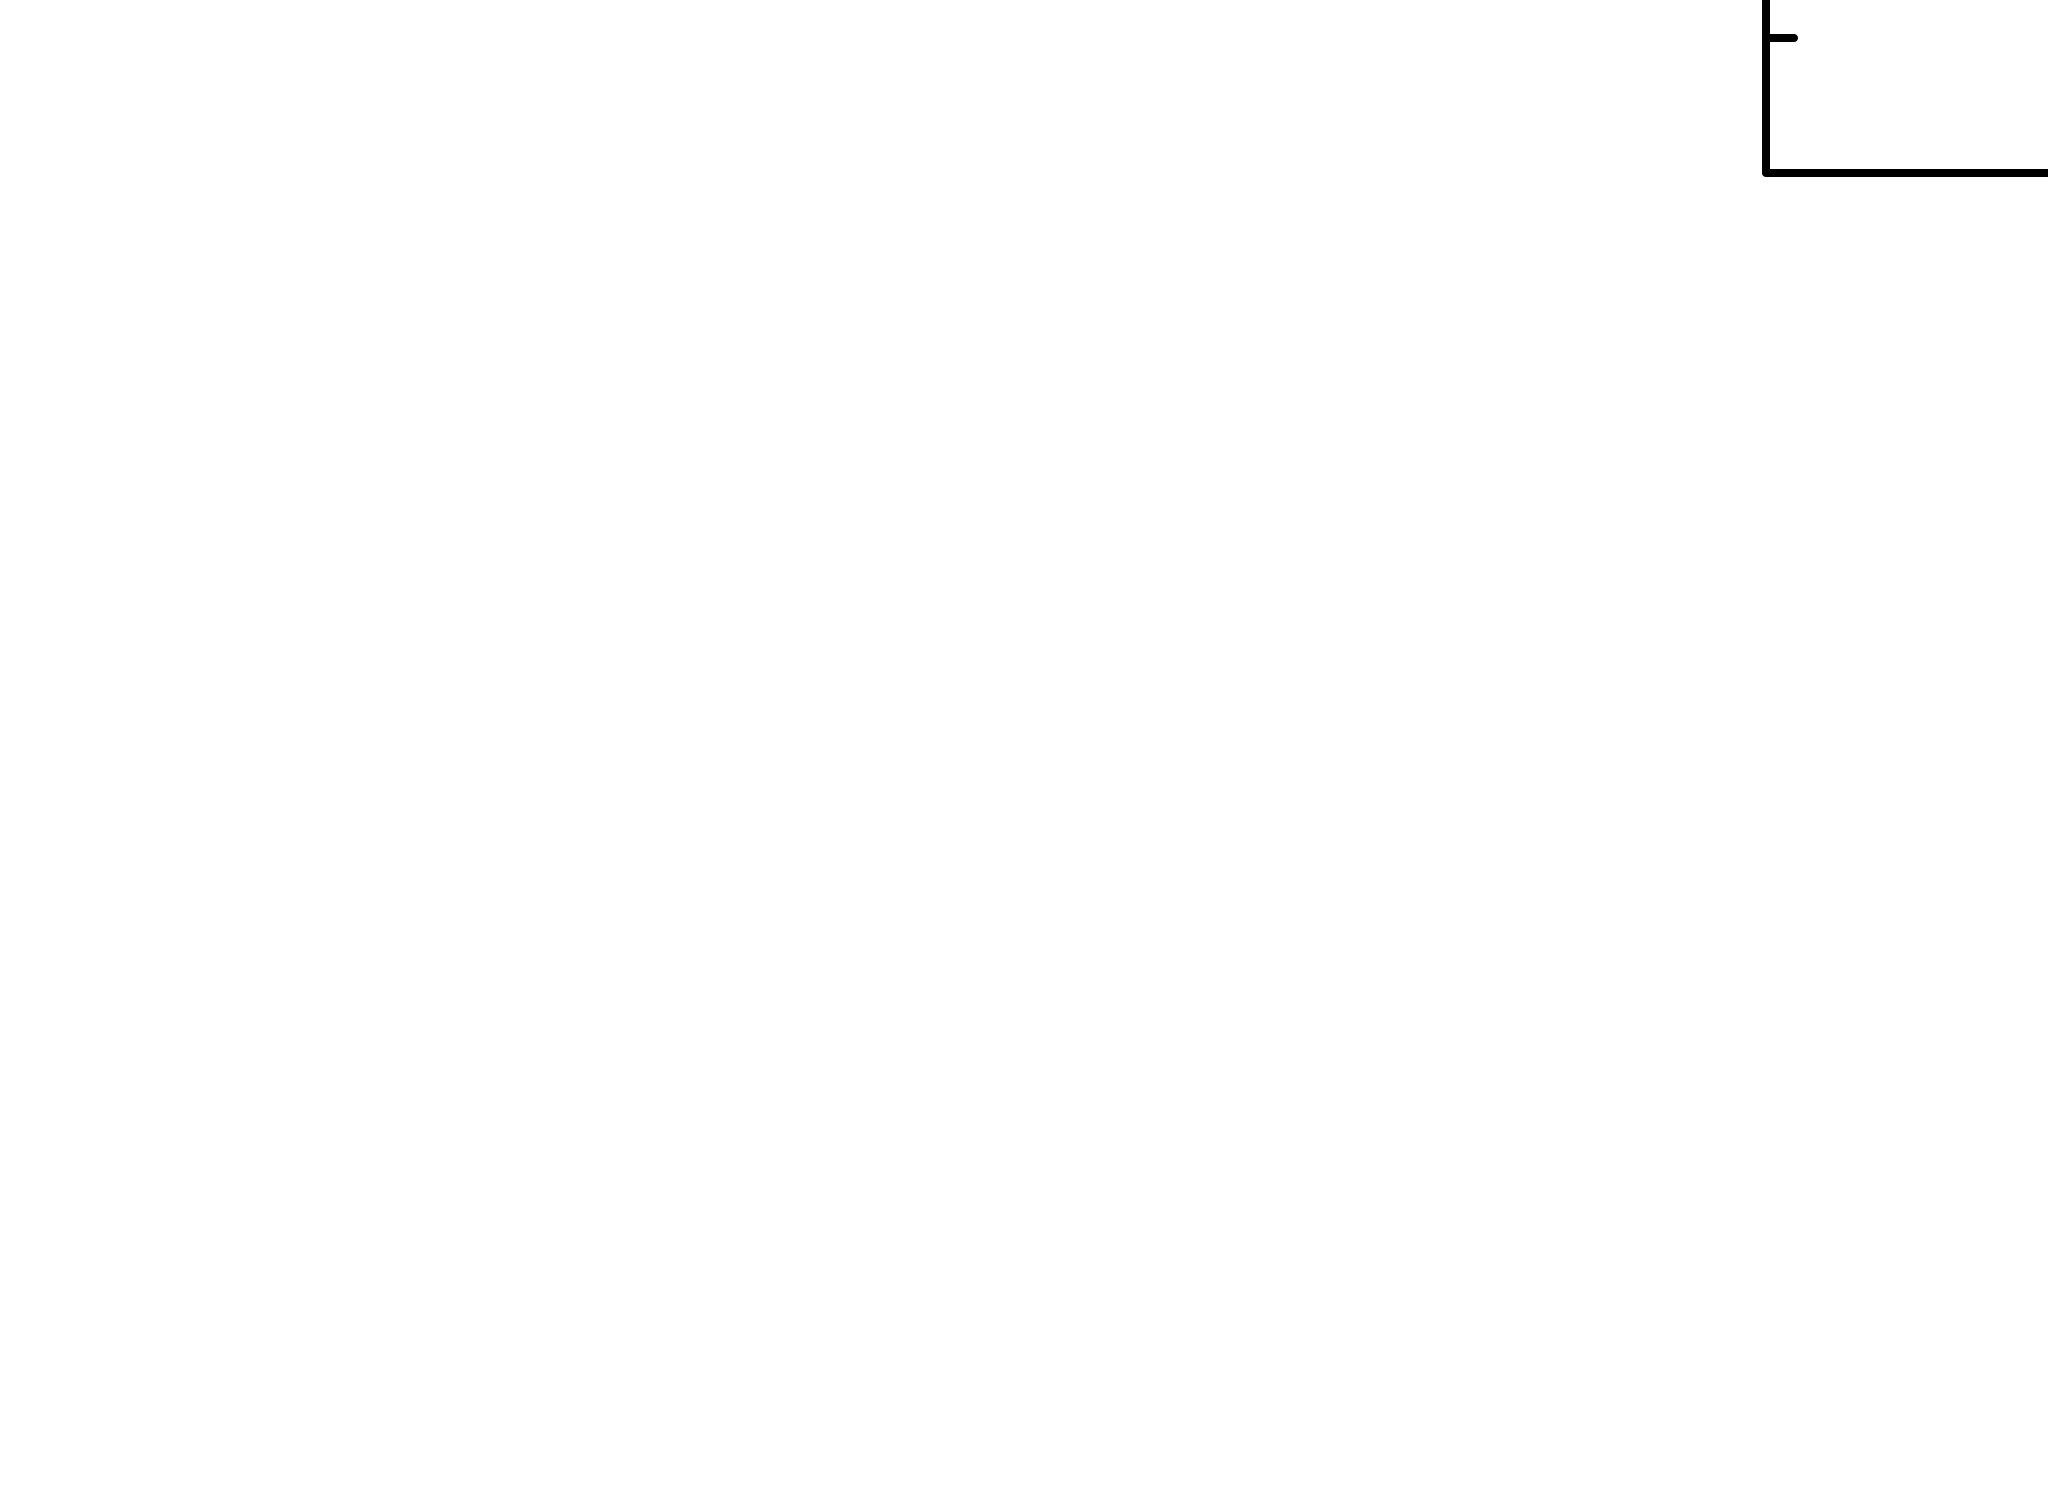

In [8]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [9]:
# Fit.error("1")
# Fit.error("2")

out_arr[2,0] = 'apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], np.inf, np.inf
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], np.inf, np.inf
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof



Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.051444e+11     using 36 bins.

Test statistic : Chi-Squared              1.051444e+11     using 36 bins.
 Null hypothesis probability of 0.000000e+00 with 33 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
144.997      33.2462      -3      0.362732      -2.48463   4.05140e-07
61.2482      1.308e+08    -4      0.149134      -1.82177   1.18460e-06
58.2371      6.60672e+06  -2      0.854646      -1.40229   2.05726e-0

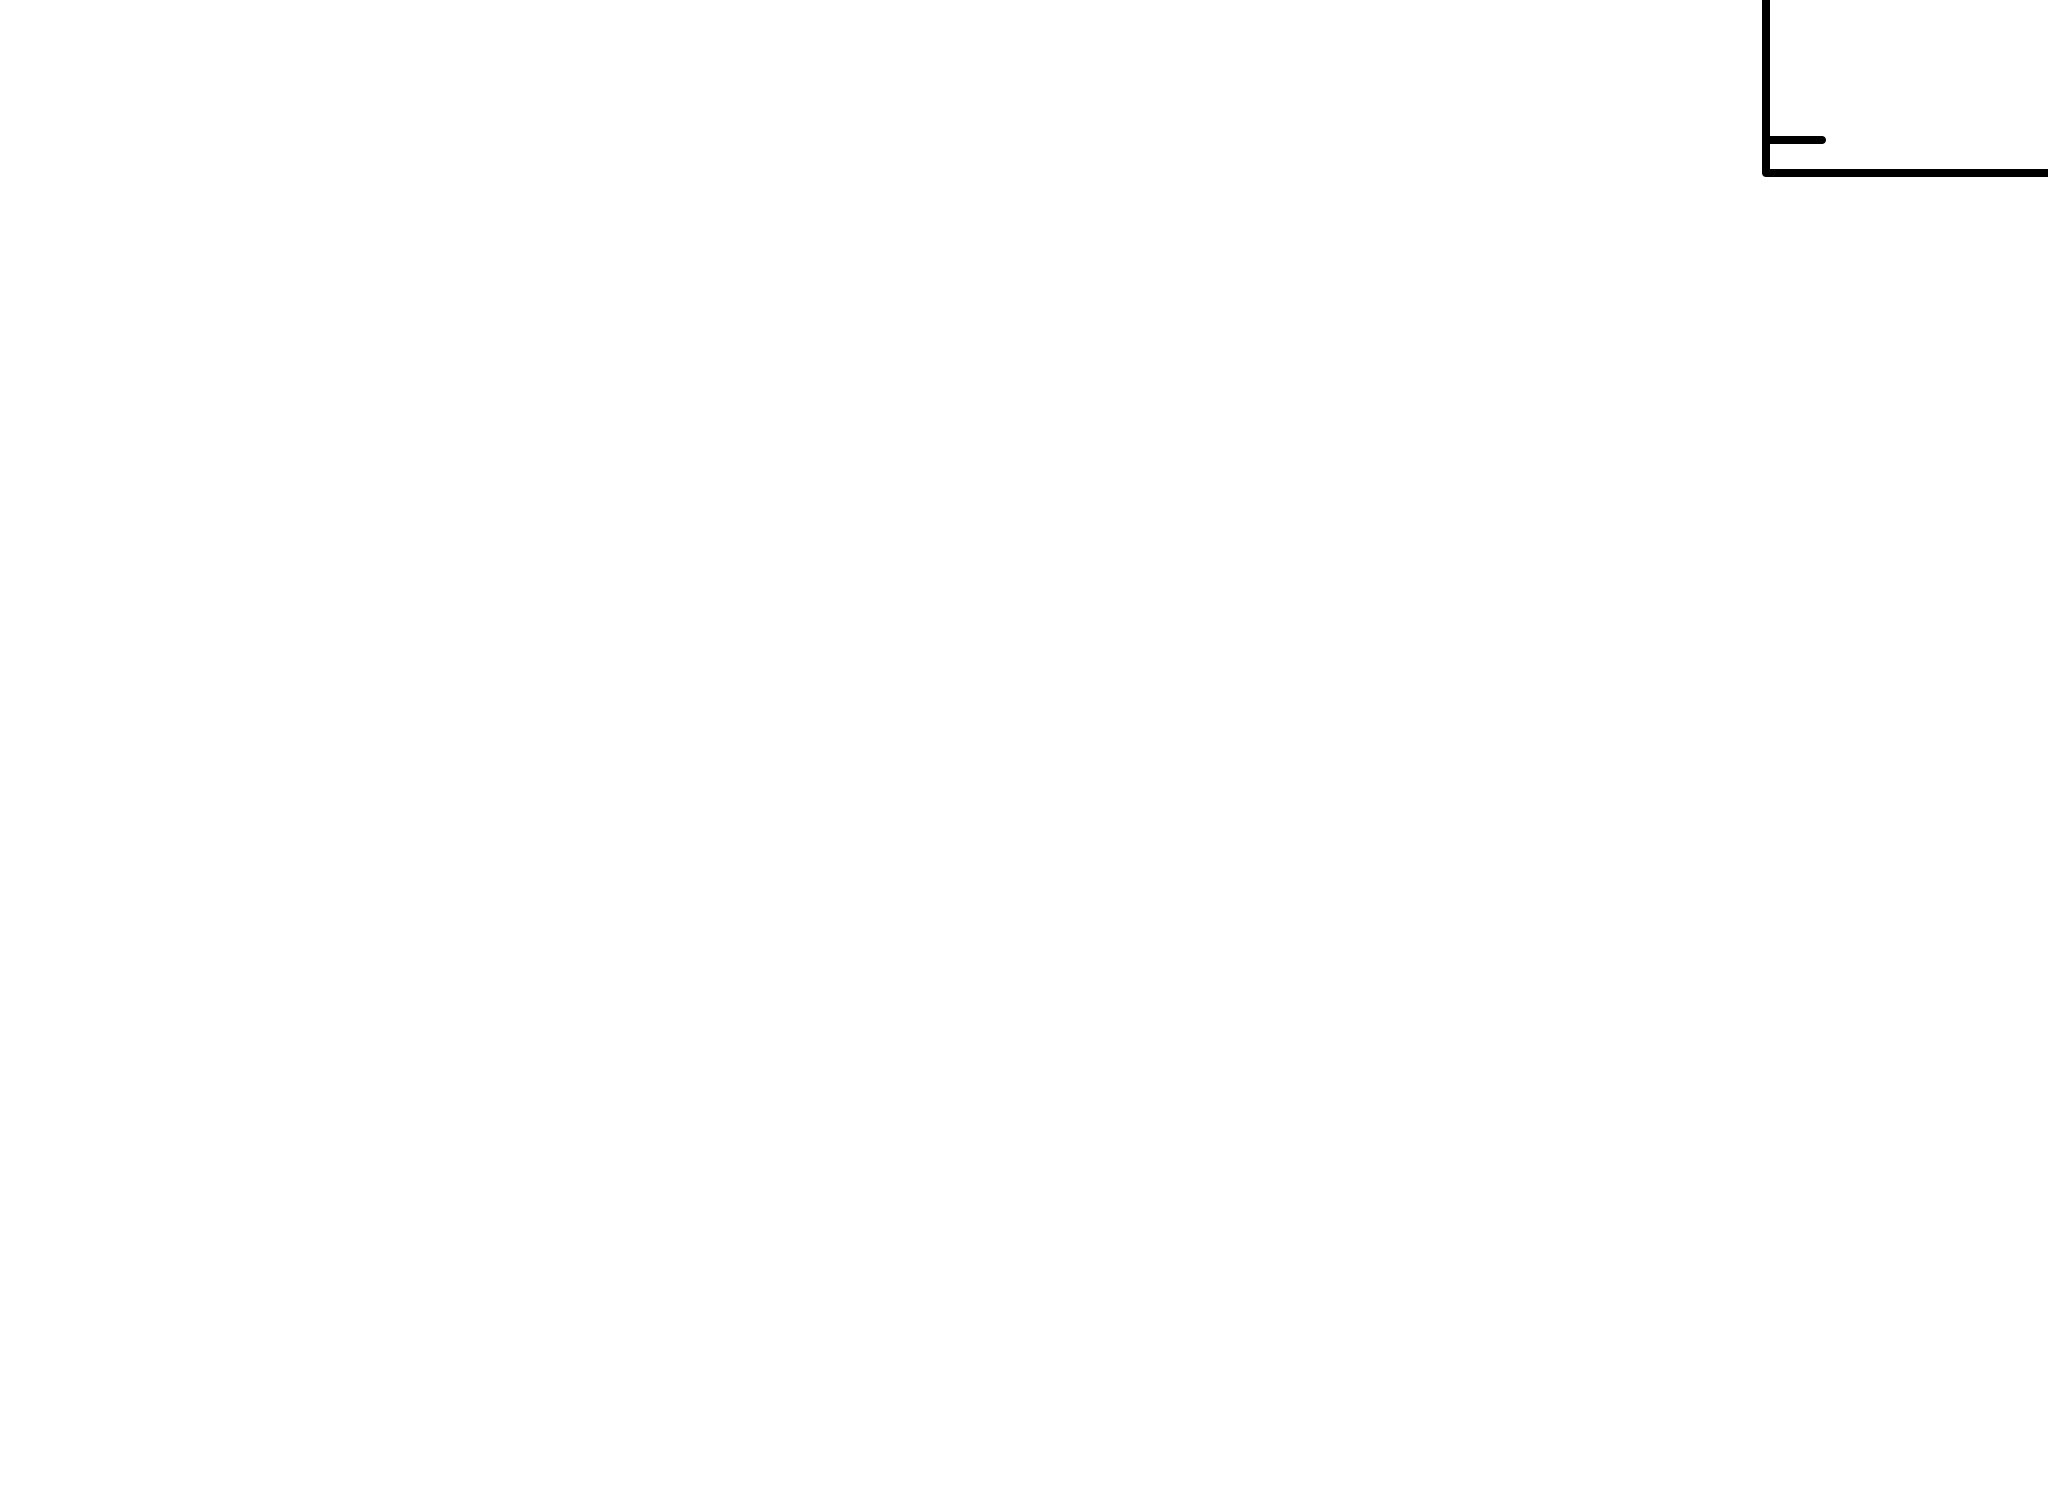

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1     0.763887      3.65461    (-1.12767,1.76305)
 Parameter   Confidence Range (2.706)
     2     -1.23937    -0.516828    (-0.341636,0.380908)


In [12]:
np.savetxt('../spec45_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [13]:
AllModels.calcFlux("0.2 10.0")

 Model Flux 0.00023571 photons (2.6127e-12 ergs/cm^2/s) range (0.20000 - 10.000 keV)


In [14]:
#plx = 0.5548
d_kpc = 8
F_x = 3.72*10**-12

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

2.8477666303180803e+34


In [15]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
34.45450439672122


In [16]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.60)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.5177117592832216e-13
F_x / F_opt:  1.3893536408119602



Model TBabs<1>(bbody<2> + bbody<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   bbody      kT         keV      3.00000      +/-  0.0          
   5    3   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.187427e+11     using 36 bins.

Test statistic : Chi-Squared              9.187427e+11     using 36 bins.
 Null hypothesis probability of 0.000000e+00 with 31 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              3.146928e+13     using 36 bins.

Test statistic : Chi-Squared              3.146928e+13     using 36 bins.
 Null hypothesis pr

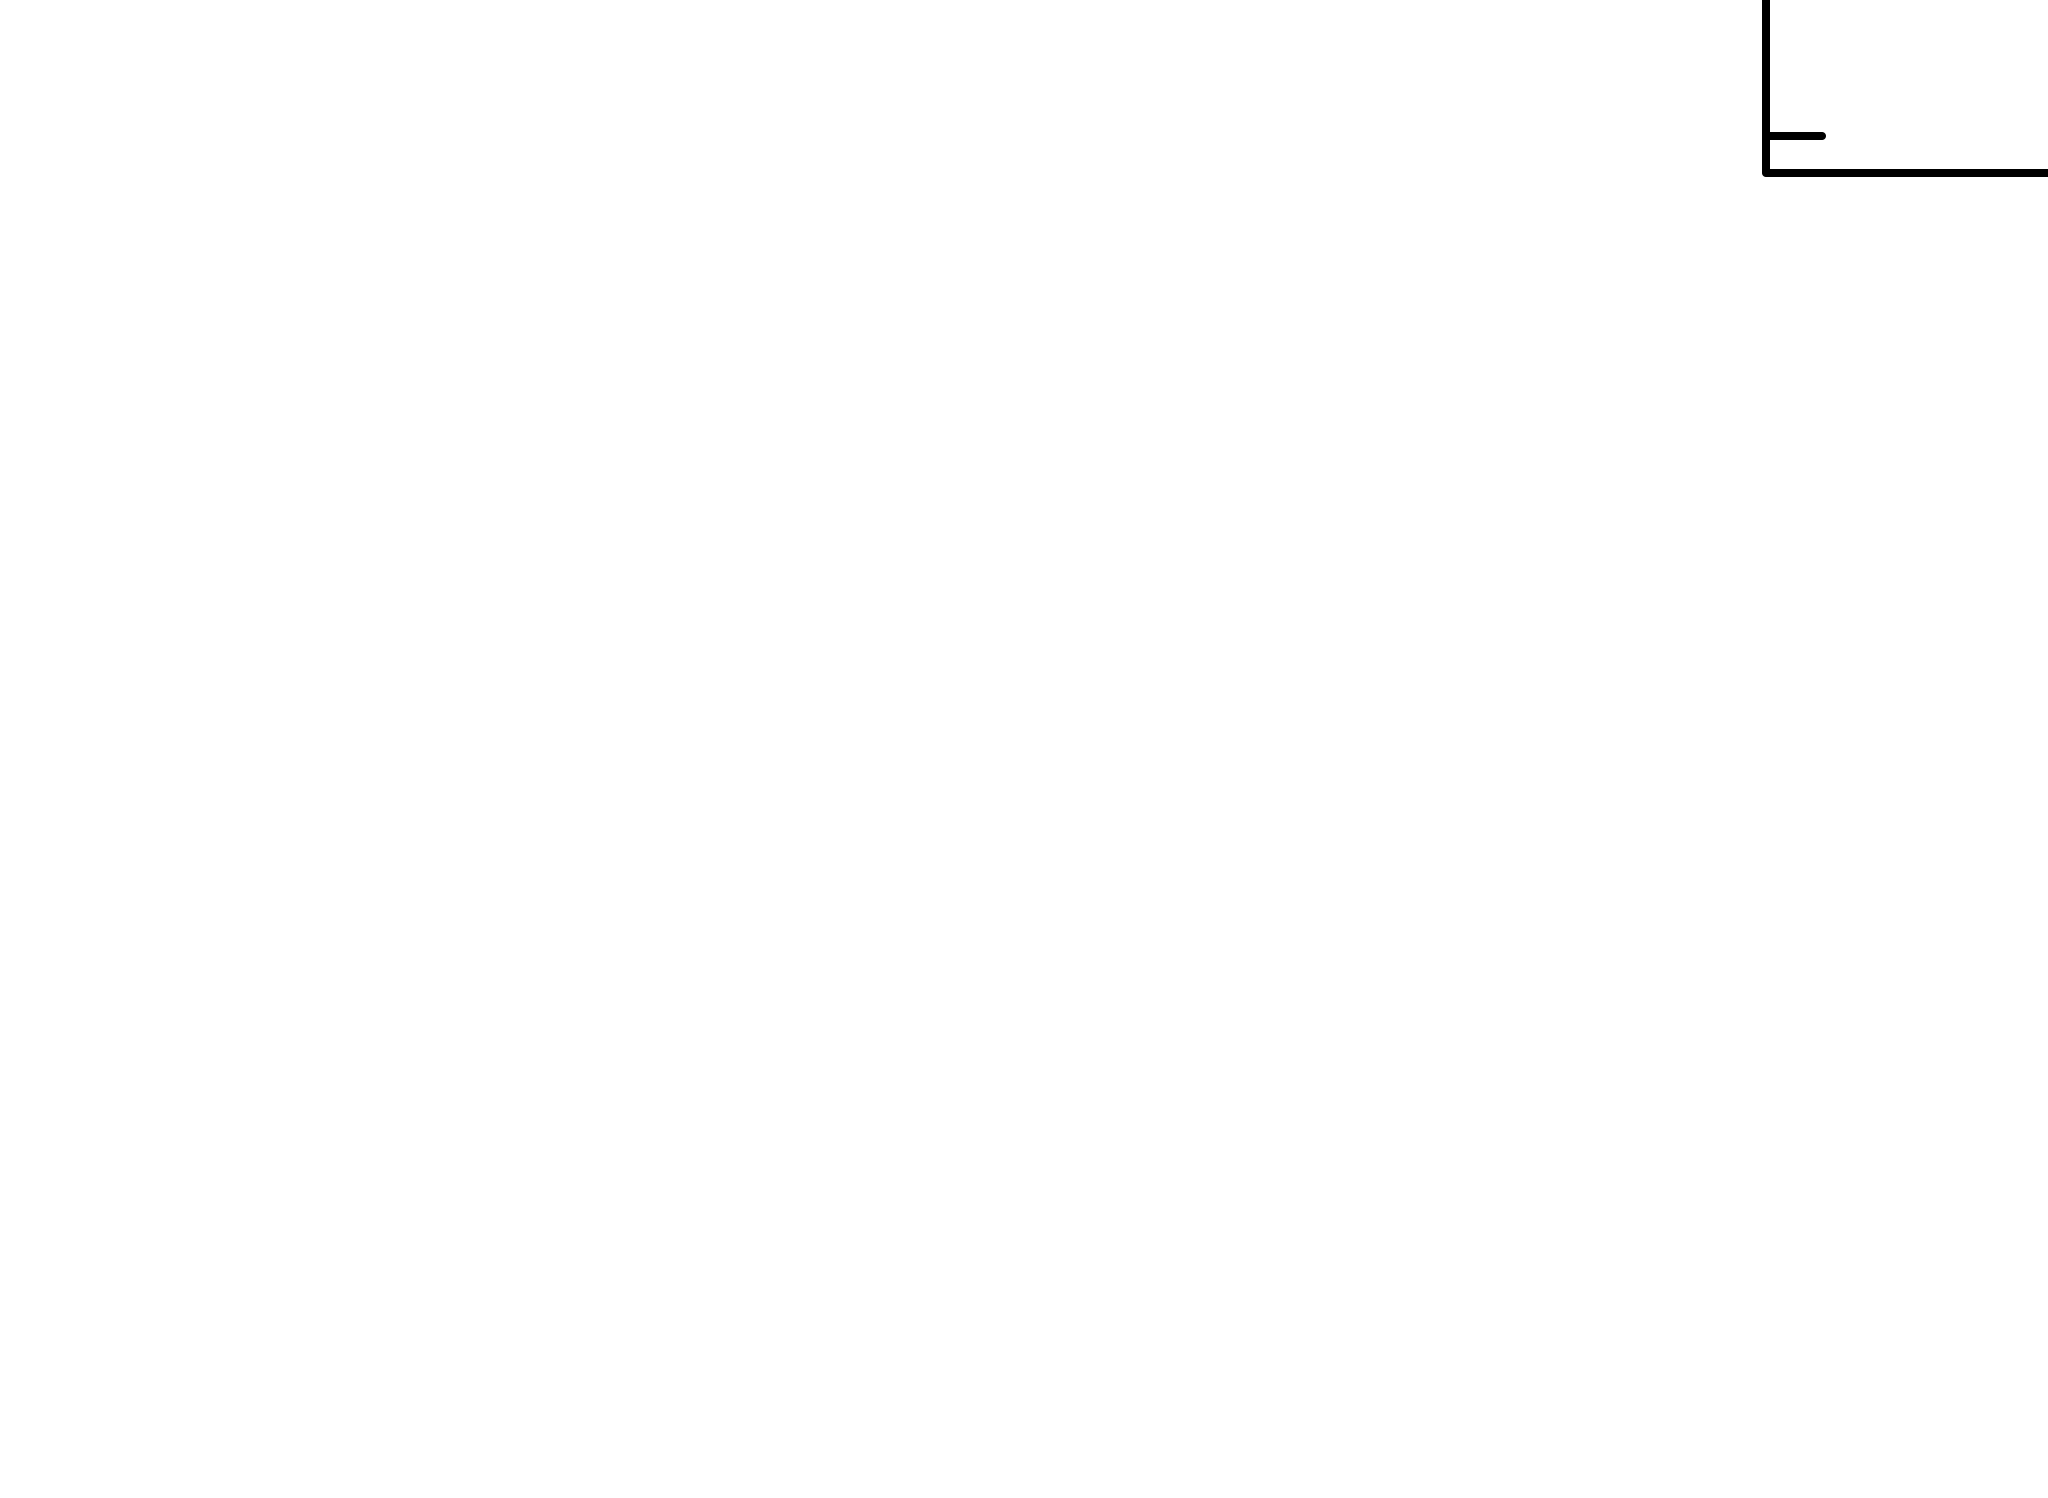

In [17]:
AllModels.clear()
mo = Model("tbabs*(bbody+bbody)")
mo.bbody.kT = 0.5
mo.bbody_3.kT = 5.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bbody<2> + bbody<3> + bbody<4>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   bbody      kT         keV      3.00000      +/-  0.0          
   5    3   bbody      norm                1.00000      +/-  0.0          
   6    4   bbody      kT         keV      3.00000      +/-  0.0          
   7    4   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.067199e+12     using 36 bins.

Test statistic : Chi-Squared              2.067199e+12     using 36 bins.
 Null hypothesis probability of 0.000000e+00 with 29 degrees of freedom
 Current data and model not fit yet.

Fit sta

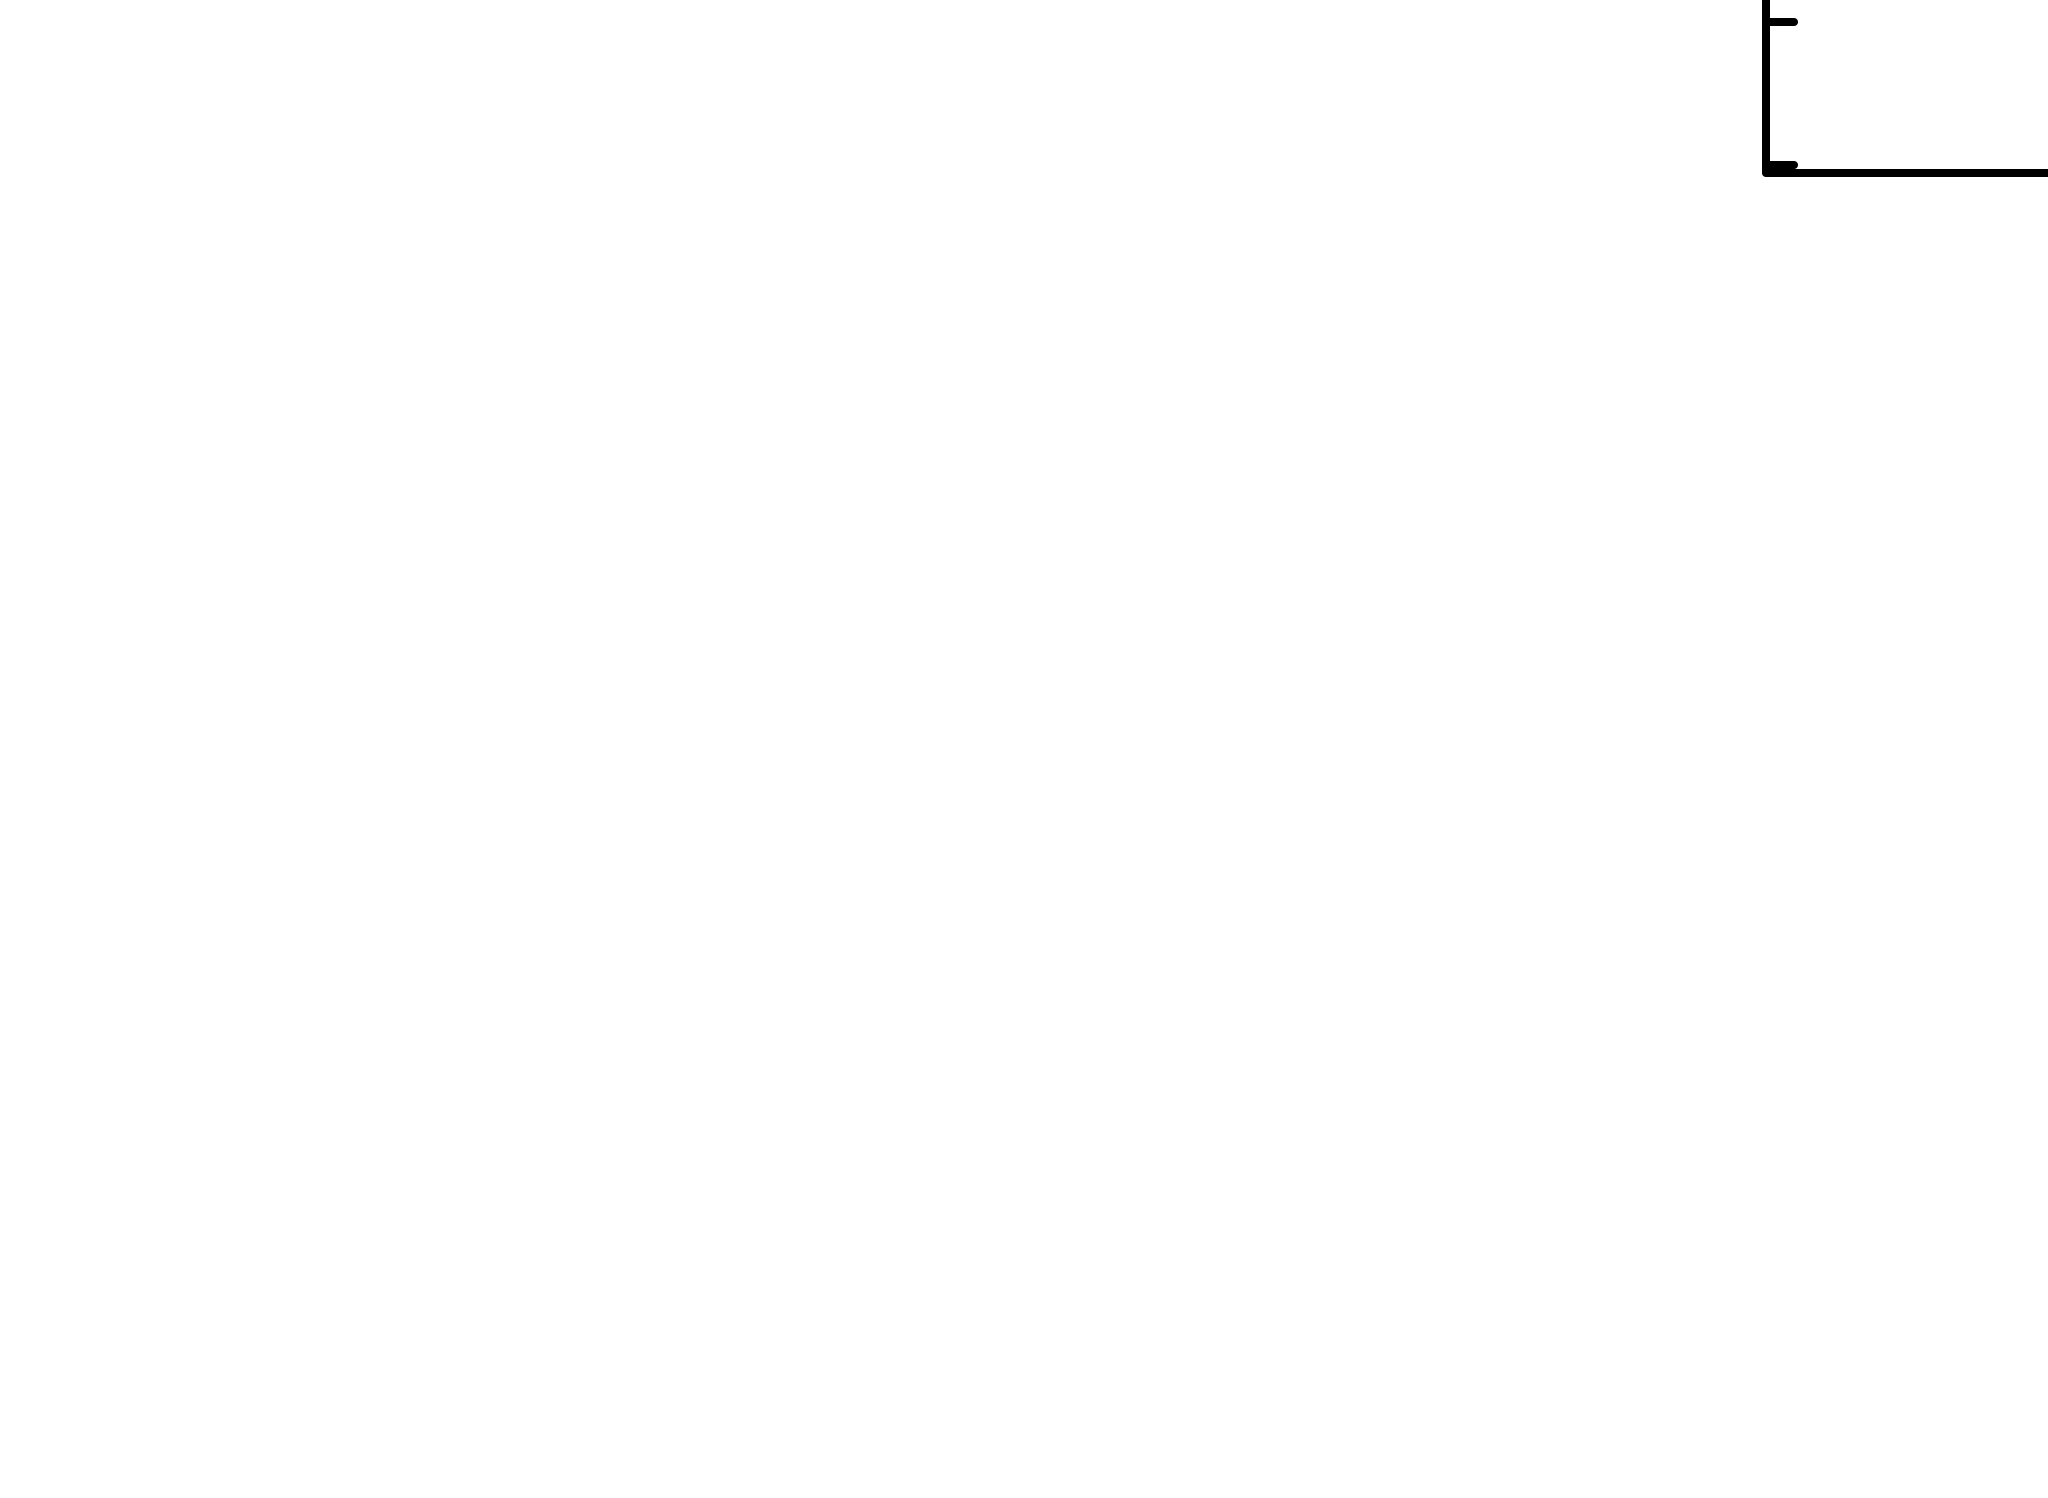

In [18]:
AllModels.clear()
mo = Model("tbabs*(bbody+bbody+bbody)")
mo.bbody.kT = 0.2
mo.bbody_3.kT = 1.0
mo.bbody_4.kT = 5
Fit.perform()
Plot("data resid")